In [ ]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
#from scipy.special import hermite, factorial, eval_hermite
from matplotlib.animation import FuncAnimation
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd


style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 4):
    display(Image(filename=f'p_statement/p{i}.jpg'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

In [ ]:
#symbols
n1, n2, hbar, m, L = sp.symbols('n1 n2 hbar m L', positive=True)
prefactor = (sp.pi**2 * hbar**2) / (2 * m * L**2)
E = lambda n: n**2


#gen combos with n1 <= n2 up to n=3
states = []
for i in range(1, 4):
    for j in range(i, 4):
        e_total = E(i) + E(j)
        e_symb = prefactor * (E(i)+E(j))#clean up
        if i == j:
            deg = 1
            type_note = 'boson only'
        else:
            deg = 2
            type_note = 'boson & fermion'
        states.append({'n1': i, 'n2': j, 'energy': e_total, 'degeneracy': deg, 'type': type_note,'esymb':e_symb})##clean this

#to df for display
df_states = pd.DataFrame(states)
df_states.sort_values('energy', inplace=True)
display(df_states)


#plt setup
fig, ax = plt.subplots(figsize=(6, 6))

# plot each level as a horizontal line with label
for idx, row in df_states.iterrows():
    ax.hlines(y=row['energy'], xmin=0, xmax=1, color='black', linewidth=2)
    label = f"{(row['n1'], row['n2'])}, deg={row['degeneracy']}"
    ax.text(1.05, row['energy'], label, va='center', fontsize=9)

ax.set_ylim(0, 15)
ax.set_xlim(0, 1.5)
ax.set_yticks(sorted(df_states['energy'].unique()))
ax.set_xticks([])
ax.set_title('Two-Particle Energy Levels in a 1D Box')
ax.set_ylabel('Energy (arb. units)')

plt.grid(True, axis='y', linestyle='dotted')
plt.tight_layout()
plt.show()


In [ ]:
#think i can do a weak shift near diag will mess with nums
df_shifted = df_states.copy()
for idx, row in df_shifted.iterrows():
    if row['n1'] == row['n2']:
        df_shifted.loc[idx, 'energy'] -= 0.7  #stronger shift
    else:
        df_shifted.loc[idx, 'energy'] -= 0.3  #weaker shift

#side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#og
for idx, row in df_states.iterrows():
    axs[0].hlines(y=row['energy'], xmin=0, xmax=1, color='black', linewidth=2)
    label = f"{(row['n1'], row['n2'])}, deg={row['degeneracy']}"
    axs[0].text(1.05, row['energy'], label, va='center', fontsize=9)

axs[0].set_title('Without Interaction')
axs[0].set_xticks([])
axs[0].set_ylabel('Energy')
axs[0].set_xlim(0, 1.5)
axs[0].grid(True, axis='y', linestyle='dotted')

#inclusive of interaction, itterrows
for idx, row in df_shifted.iterrows():
    axs[1].hlines(y=row['energy'], xmin=0, xmax=1, color='blue', linewidth=2)
    label = f"{(row['n1'], row['n2'])}"
    axs[1].text(1.05, row['energy'], label, va='center', fontsize=9)

axs[1].set_title('With Weak Attraction')
axs[1].set_xticks([])
axs[1].set_xlim(0, 1.5)
axs[1].grid(True, axis='y', linestyle='dotted')

plt.suptitle('come back to this, dunno if valid', fontsize=14)
plt.tight_layout()
plt.show()


In [11]:
#p2
#symb
x, x1, x2, L = sp.symbols('x x1 x2 L', real=True, positive=True)

#single particle wave f
phi1 = sp.sqrt(2/L) * sp.sin(sp.pi * x / L)
phi2 = sp.sqrt(2/L) * sp.sin(2 * sp.pi * x / L)

#a
psi_D = phi1.subs(x, x1) * phi2.subs(x, x2)
P_D = sp.simplify(sp.integrate(psi_D**2, (x2, 0, L)))

#b : bosons
psi_plus = (1/sp.sqrt(2)) * (phi1.subs(x, x1)*phi2.subs(x, x2) + phi2.subs(x, x1)*phi1.subs(x, x2))
P_plus = sp.simplify(sp.integrate(psi_plus**2, (x2, 0, L)))

#c fer,opms
psi_minus = (1/sp.sqrt(2)) * (phi1.subs(x, x1)*phi2.subs(x, x2) - phi2.subs(x, x1)*phi1.subs(x, x2))
P_minus = sp.simplify(sp.integrate(psi_minus**2, (x2, 0, L)))

display(P_D, P_plus, P_minus)

2*sin(pi*x1/L)**2/L

(sin(pi*x1/L)**2 + sin(2*pi*x1/L)**2)/L

(sin(pi*x1/L)**2 + sin(2*pi*x1/L)**2)/L

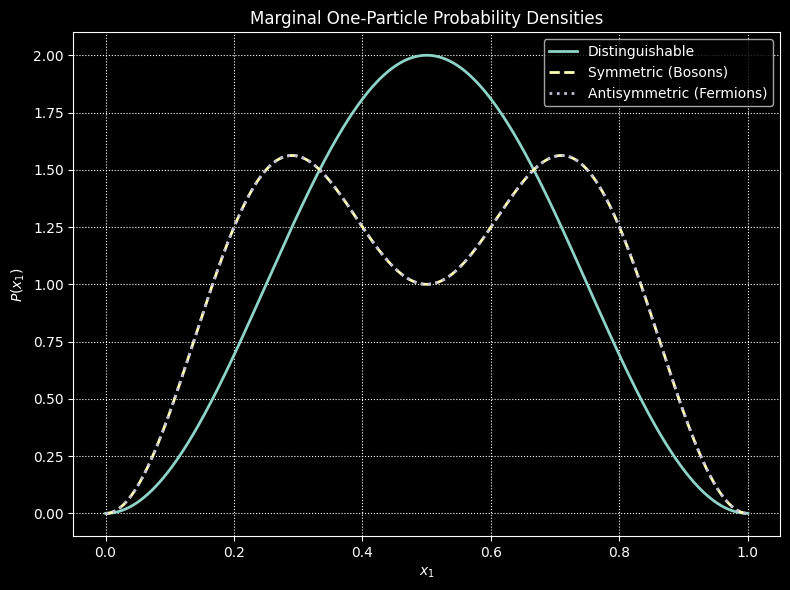

In [13]:
#constants
L_val = 1
x_vals = np.linspace(0, L_val, 500)

#single wavefunction
phi1_vals = np.sqrt(2/L_val) * np.sin(np.pi * x_vals / L_val)
phi2_vals = np.sqrt(2/L_val) * np.sin(2 * np.pi * x_vals / L_val)

#p(x)
P_D_vals = phi1_vals**2
P_sym_vals = 0.5 * (phi1_vals**2 + phi2_vals**2)
P_antisym_vals = P_sym_vals  # same result

#plt
plt.figure(figsize=(8,6))
plt.plot(x_vals, P_D_vals, label='Distinguishable', lw=2)
plt.plot(x_vals, P_sym_vals, label='Symmetric (Bosons)', lw=2, linestyle='--')
plt.plot(x_vals, P_antisym_vals, label='Antisymmetric (Fermions)', lw=2, linestyle=':')
plt.title('Marginal One-Particle Probability Densities')
plt.xlabel('$x_1$')
plt.ylabel('$P(x_1)$')
plt.grid(True, linestyle='dotted')
plt.legend()
plt.tight_layout()
plt.savefig('p2_probability_densities.png',dpi=600)
plt.show()

In [14]:
move_plots()

Moved p2_probability_densities.png to graphs
